In [24]:
# Importar librerias
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

# Cargamos el dataset
PHT = pd.read_csv("dataset-prueba2.csv")
PHT.head(7)

,Muestra 1,Muestra 2,Muestra 3,Muestra 4,Muestra 5,Muestra 6,Muestra 7,Muestra 8,Muestra 9,Muestra 10,...,Muestra 56,Muestra 57,Muestra 58,Muestra 59,Muestra 60,Muestra 61,Muestra 62,Muestra 63,Muestra 64,resultado
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
5,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0
6,-12.0,-5.0,-1.0,4.0,-16.0,-17.0,-69.0,-16.0,-12.0,-3.0,...,1.0,-36.0,-10.0,-12.0,-16.0,-12.0,-47.0,6.0,-30.0,0


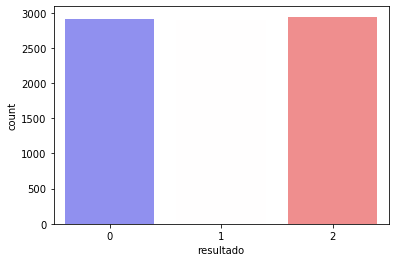

In [25]:
#Descripcion de mi dataset según mi etiqueta
sb.countplot(x="resultado", data=PHT, palette="bwr")
plt.show()

In [26]:
# Guardar mi etiqueta en una variable resultY
resultY=PHT['resultado']
PHT=PHT.drop(['resultado'],1)

In [27]:
# Verificar si se elimino la columna resultado
PHT.head(2)

,Muestra 1,Muestra 2,Muestra 3,Muestra 4,Muestra 5,Muestra 6,Muestra 7,Muestra 8,Muestra 9,Muestra 10,...,Muestra 55,Muestra 56,Muestra 57,Muestra 58,Muestra 59,Muestra 60,Muestra 61,Muestra 62,Muestra 63,Muestra 64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0


In [38]:
#selección de la primera columna de nuestro dataset hasta la columna 65
X = PHT.iloc[0:len(PHT),0:65]
#selección de la segunda columna de nuestro dataset
y = resultY

In [39]:
# En este apartado se divide el dataset a un 30% test. La idea es ir modificando el porcentaje del dataset de entrenamiento-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [40]:
#Predicciones. Evaluacion del modelo mediante la matriz de confusion
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[784  14  92]
 [  6 751  91]
 [ 68  97 724]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       890
           1       0.87      0.89      0.88       848
           2       0.80      0.81      0.81       889

    accuracy                           0.86      2627
   macro avg       0.86      0.86      0.86      2627
weighted avg       0.86      0.86      0.86      2627



In [92]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [41]:
##Regresion logistica

from sklearn.linear_model import LogisticRegression

#Aprendizaje
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
#Predicciones
y_pred = LogReg.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[401 240 249]
 [112 372 364]
 [175 340 374]]
              precision    recall  f1-score   support

           0       0.58      0.45      0.51       890
           1       0.39      0.44      0.41       848
           2       0.38      0.42      0.40       889

    accuracy                           0.44      2627
   macro avg       0.45      0.44      0.44      2627
weighted avg       0.45      0.44      0.44      2627



In [99]:
##random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

clf = RandomForestClassifier(n_estimators=15)
clf = clf.fit(X_train, y_train)

#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1733    3   33]
 [   1 1628  102]
 [  77   45 1632]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1769
           1       0.97      0.94      0.96      1731
           2       0.92      0.93      0.93      1754

    accuracy                           0.95      5254
   macro avg       0.95      0.95      0.95      5254
weighted avg       0.95      0.95      0.95      5254



In [47]:
# En este apartado se divide el dataset a un 40% test. La idea es ir modificando el porcentaje del dataset de entrenamiento-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state=25)

from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [48]:
#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1042   13  122]
 [  13 1036   96]
 [  97  139  945]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1177
           1       0.87      0.90      0.89      1145
           2       0.81      0.80      0.81      1181

    accuracy                           0.86      3503
   macro avg       0.86      0.86      0.86      3503
weighted avg       0.86      0.86      0.86      3503



In [49]:
##Regresion logistica

from sklearn.linear_model import LogisticRegression

#Aprendizaje
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
#Predicciones
y_pred = LogReg.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[534 298 345]
 [176 483 486]
 [264 411 506]]
              precision    recall  f1-score   support

           0       0.55      0.45      0.50      1177
           1       0.41      0.42      0.41      1145
           2       0.38      0.43      0.40      1181

    accuracy                           0.43      3503
   macro avg       0.44      0.43      0.44      3503
weighted avg       0.44      0.43      0.44      3503



In [51]:
##random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=15)
clf = clf.fit(X_train, y_train)

#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1155    4   18]
 [   1 1076   68]
 [  39   27 1115]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1177
           1       0.97      0.94      0.96      1145
           2       0.93      0.94      0.94      1181

    accuracy                           0.96      3503
   macro avg       0.96      0.96      0.96      3503
weighted avg       0.96      0.96      0.96      3503



In [69]:
# En este apartado se divide el dataset a un 60% test. La idea es ir modificando el porcentaje del dataset de entrenamiento-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .6, random_state=25)

from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [70]:
#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1562   16  191]
 [   4 1537  190]
 [ 140  191 1423]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1769
           1       0.88      0.89      0.88      1731
           2       0.79      0.81      0.80      1754

    accuracy                           0.86      5254
   macro avg       0.86      0.86      0.86      5254
weighted avg       0.86      0.86      0.86      5254

